# User Preprocessing
- The aim here is to build a user database from our user pool summary statistics

### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#### Display options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Jupytper Config
%config Completer.use_jedi = False
%config IPCompleter.greedy=True
pd.set_option('display.max_columns', None)

np.random.seed(42) # this is how to set a random seed.

### Import External Files

In [2]:
# Data file produced by tests.
df = pd.read_csv('./CSV/colour_data_notebooks.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5821 entries, 0 to 5820
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user             5821 non-null   object
 1   correct          5821 non-null   int64 
 2   recorded_result  5821 non-null   object
 3   mask_image       5821 non-null   object
 4   cb_type1         5821 non-null   int64 
 5   cb_type2         5821 non-null   int64 
 6   ncb              5821 non-null   int64 
 7   datetime         5821 non-null   object
 8   random_spread    5821 non-null   int64 
 9   pallet_used      5821 non-null   object
 10  pallet_values    5821 non-null   object
 11  ishihara_list    5821 non-null   object
 12  COLORS_ON        5821 non-null   object
 13  COLORS_OFF       5821 non-null   object
dtypes: int64(5), object(9)
memory usage: 636.8+ KB


### This data comes directly from the postgres DB.

In [3]:
# df['user'] = [i[:5] for i in df['user']] # shorten uncessesary long usernames.
df.head(3).append(df.tail(3))

,user,correct,recorded_result,mask_image,cb_type1,cb_type2,ncb,datetime,random_spread,pallet_used,pallet_values,ishihara_list,COLORS_ON,COLORS_OFF
0,unknown_1,1,5,5,0,0,1,16/6/20 11:22,10,bear,"[#e26f39,#f6c458,#e09c3e,#e69e40,#ed7b3d,#f5be...","[(220,105,53),(239,192,86),(227,162,61),(222,1...","[(220,105,53),(239,192,86),(227,162,61),(222,1...","[(71,138,38),(92,73,38),(153,165,49),(221,221,..."
1,unknown_1,1,C,C,0,0,1,16/6/20 11:20,10,bear,"[#e26f39,#f6c458,#e09c3e,#e69e40,#ed7b3d,#f5be...","[(232,116,65),(247,198,95),(221,152,56),(220,1...","[(232,116,65),(247,198,95),(221,152,56),(220,1...","[(65,149,38),(99,72,41),(168,165,50),(223,211,..."
2,unknown_1,1,D,D,0,0,1,16/6/20 11:30,10,bear,"[#e26f39,#f6c458,#e09c3e,#e69e40,#ed7b3d,#f5be...","[(226,114,54),(253,186,87),(233,148,70),(236,1...","[(226,114,54),(253,186,87),(233,148,70),(236,1...","[(75,142,40),(96,64,34),(162,152,41),(224,219,..."
5818,unknown_30,1,2,2,0,1,1,24:26.4,10,standard_3,"[#89B270, #7AA45E, #B6C674, #7AA45E, #B6C674, ...","[(135, 178, 121), (114, 159, 90), (186, 198, 1...","[(135, 178, 121), (114, 159, 90), (186, 198, 1...","[(244, 152, 36), (198, 126, 94), (229, 132, 10..."
5819,unknown_30,1,5,5,0,1,1,25:41.5,10,standard_3,"[#89B270, #7AA45E, #B6C674, #7AA45E, #B6C674, ...","[(131, 179, 105), (114, 163, 100), (173, 207, ...","[(131, 179, 105), (114, 163, 100), (173, 207, ...","[(235, 157, 39), (195, 119, 86), (230, 146, 97..."
5820,unknown_30,1,4,4,0,1,1,25:57.5,10,standard_3,"[#89B270, #7AA45E, #B6C674, #7AA45E, #B6C674, ...","[(133, 177, 104), (131, 154, 98), (179, 193, 1...","[(133, 177, 104), (131, 154, 98), (179, 193, 1...","[(239, 152, 46), (200, 116, 86), (226, 141, 11..."


### User Averages

In [4]:
user_list = list(df['user'].unique())
user_score = []

for i in df['user'].unique():
    isolated_user = df[df['user'] == i] # Create stats mask for individual stats for each iteration
    user_score.append(isolated_user['correct'].groupby(df['pallet_used']).mean())

user_scores = pd.DataFrame(user_score, index=user_list) # make a user sorted dataframe.
user_scores

pallet_used,bear,bluey2,camo2,greys,inverse_ring,orn_grn,pinks,reversed_ring,ring,standard_1,standard_2,standard_3
unknown_1,0.800000,0.777778,0.500000,0.285714,0.142857,0.833333,0.250000,0.090909,0.666667,0.000000,0.833333,0.714286
male_ncb_2,1.000000,1.000000,1.000000,1.000000,0.750000,1.000000,0.375000,0.600000,0.444444,0.833333,1.000000,0.750000
colourblind_type1_3,0.222222,0.388889,0.900000,0.428571,0.619048,0.269231,0.333333,0.473684,0.441176,0.307692,0.500000,0.454545
unknown_4,0.585714,0.507246,0.543210,0.405405,0.206897,0.558442,0.037975,0.074627,0.187500,0.500000,0.462687,0.500000
unknown_5,0.457143,0.370370,0.321429,0.558824,0.230769,0.473684,0.032258,0.120000,0.312500,0.454545,0.550000,0.416667
unknown_6,0.473684,0.486486,0.575342,0.538462,0.160000,0.515152,0.058824,0.024096,0.138462,0.506667,0.558824,0.475410
unknown_7,0.529412,0.428571,0.294118,0.428571,0.100000,0.476190,0.076923,0.062500,0.130435,0.500000,0.521739,0.333333
male_8,0.714286,0.666667,1.000000,1.000000,0.333333,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
male_9,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000,0.500000,0.200000,0.600000,0.500000,0.500000,1.000000
male_ncb_10,0.933333,1.000000,1.000000,1.000000,1.000000,0.954545,0.920000,0.909091,0.882353,0.961538,1.000000,0.954545


### User Correlation Heat Map

In [5]:
# Thanks Kev
def correlation_heat_map(df):
    corrs = df.corr()
    fig, ax = plt.subplots(figsize = (14,14))
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
    ax = sns.heatmap(corrs, annot=True, mask=mask, cmap = 'coolwarm')
    plt.show()

<ipython-input-5-30e708b5d71c>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
<ipython-input-5-30e708b5d71c>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)


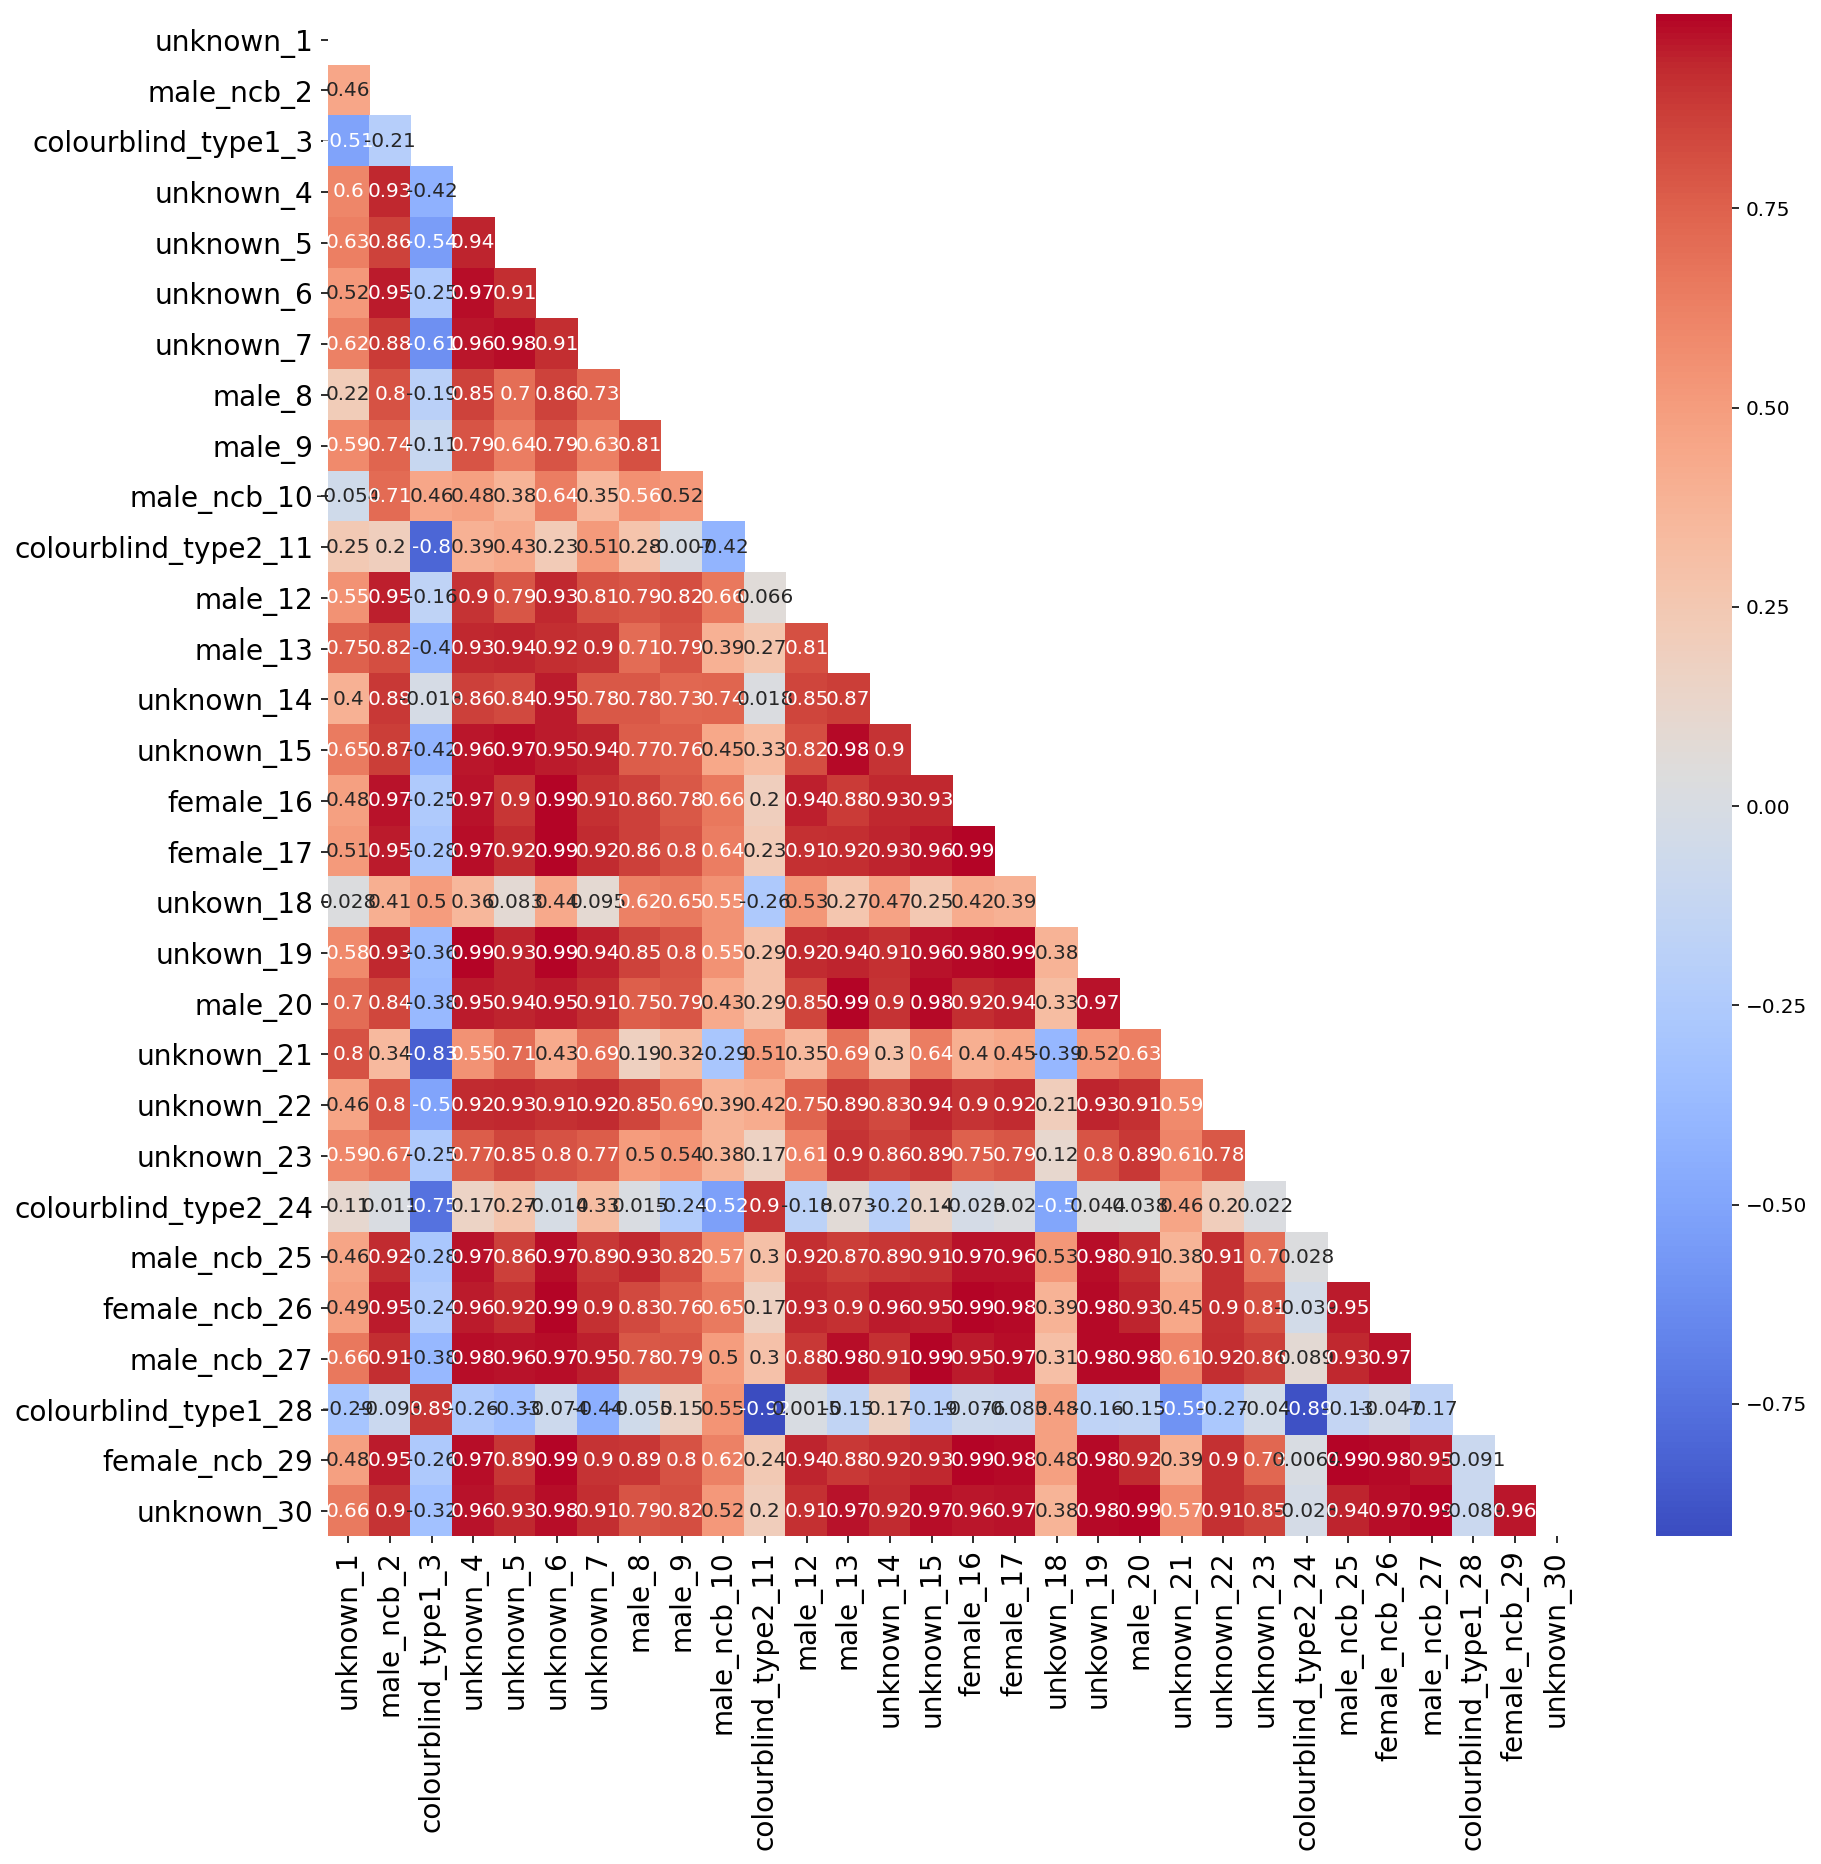

In [6]:
correlations = user_scores.T # make a second transposed dataframe for heatmap
correlations.columns = user_list # assign columns
correlations = correlations.corr().sort_index(ascending=True) # for 50% chart.

correlation_heat_map(correlations)

### Pallet Averages

In [7]:
pallet_list = list(df.pallet_used.unique())
pallet_avg = []

for i in df.pallet_used.unique():
    pallet_stats = df[df['pallet_used'] == i] # individual stats for each iteration
    pallet_avg.append(pallet_stats['correct'].groupby(df['user']).mean())

pallet_avg = pd.DataFrame(pallet_avg, index=pallet_list) # make a user sorted dataframe.

### Pallet Mean Correlation Heat Map

<ipython-input-5-30e708b5d71c>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
<ipython-input-5-30e708b5d71c>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)


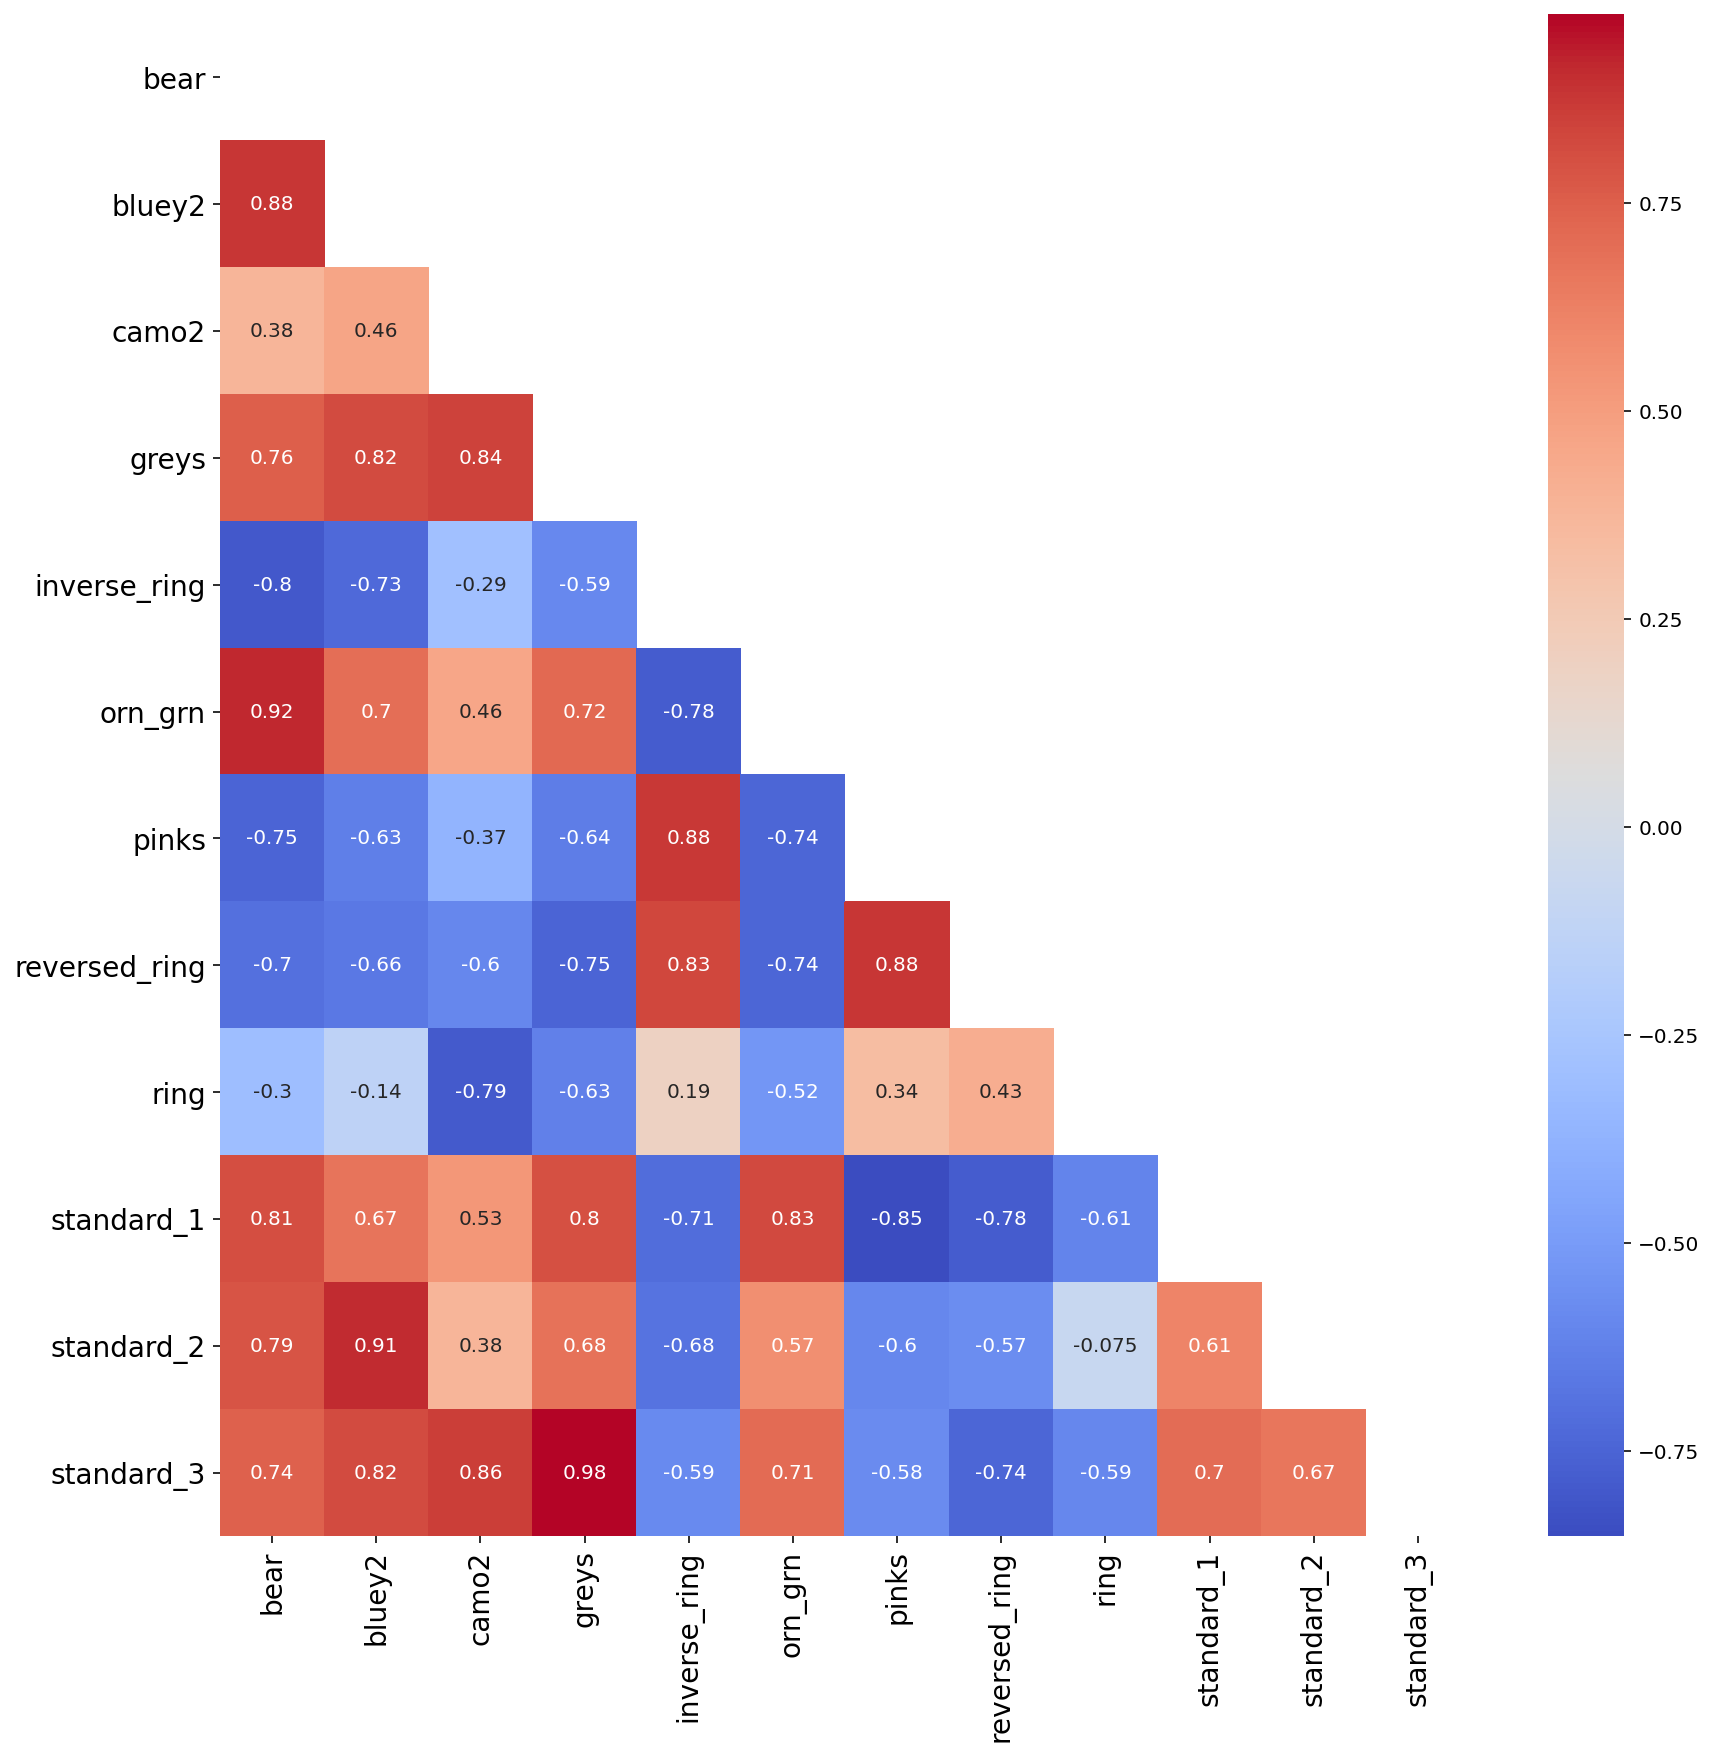

In [8]:
pallet_correlations = pallet_avg.T # make a second transposed dataframe for heatmap
pallet_correlations.columns = pallet_list # assign columns
pallet_correlations = pallet_correlations.corr()
    
correlation_heat_map(pallet_correlations)

### Comparison of Pallets

In [9]:
c = pallet_correlations

s = c.unstack()
so = s.sort_values(kind="quicksort")
print(len(so))
print('---'*15)
print('Least Similar Correlations')
print('---'*15)
print(so[:20])
print('---'*15)
print('Most Similar Correlations')
print('---'*15)
print(so[120:135])

144
---------------------------------------------
Least Similar Correlations
---------------------------------------------
camo2          ring            -0.041635
ring           camo2           -0.041635
standard_1     pinks            0.036236
pinks          standard_1       0.036236
ring           standard_1       0.049483
standard_1     ring             0.049483
reversed_ring  standard_1       0.104802
standard_1     reversed_ring    0.104802
orn_grn        ring             0.138673
ring           orn_grn          0.138673
               standard_3       0.141276
standard_3     ring             0.141276
camo2          reversed_ring    0.145735
reversed_ring  camo2            0.145735
inverse_ring   orn_grn          0.152402
orn_grn        inverse_ring     0.152402
reversed_ring  standard_3       0.162810
standard_3     reversed_ring    0.162810
reversed_ring  orn_grn          0.163718
orn_grn        reversed_ring    0.163718
dtype: float64
------------------------------------------

### User Averages

In [10]:
# Add identfiers to columns
user_scores = user_scores.add_prefix('usr_scores_').add_suffix('_mean')
correlations = correlations.add_suffix('_corr') # reset columns names. No longer diagnoally aligned.

### Feature Engineering

In [11]:
# Group 1 - Sums of user responses per pallet category.
cb1_responses = []
cb2_responses = []
ncb_responses = []

# Group 2 - Means of user responses per pallet category.
cb1_percent_correct = []
cb2_percent_correct = []
ncb_percent_correct = []

# Group 3 - Score & Count (of binary responses)
percent_correct = []
responses = []

# Group 4 - list of correct responses by pallet.
user_sums = []

for i in df.user.unique():
    isolated_user = df[df['user'] == i] # make user mask for stats.
    
    # Group 1 - Sum of user responses per pallet category.
    cb1_responses.append(isolated_user['cb_type1'].sum()) # cb1 type total correct
    cb2_responses.append(isolated_user['cb_type2'].sum()) # cb2 type total correct
    ncb_responses.append(isolated_user['ncb'].sum()) # NCB type total correct
    
    # Group 2 - Mean of user responses per pallet category.
    cb1_percent_correct.append(isolated_user['cb_type1'].mean())
    cb2_percent_correct.append(isolated_user['cb_type2'].mean())
    ncb_percent_correct.append(isolated_user['ncb'].mean())
    
    # Group 3 - Score & Count (of binary responses)
    percent_correct.append(isolated_user['correct'].mean()) # % (float) of correct responses
    responses.append(isolated_user['correct'].value_counts().sum()) # number of correct responses
    
    # Group 4 - list of correct responses by pallet.
    user_sums.append(isolated_user['correct'].groupby(df['pallet_used']).sum())

# Group 1 - Sums
user_scores['cb1_responses'] = cb1_responses
user_scores['cb2_responses'] = cb2_responses
user_scores['ncb_responses'] = ncb_responses
    
# Group 2 - Means
user_scores['cb1_percent_correct'] = cb1_percent_correct
user_scores['cb2_percent_correct'] = cb2_percent_correct
user_scores['ncb_percent_correct'] = ncb_percent_correct

# Group 3 - Score & Count
user_scores['percent_correct'] = percent_correct
user_scores['responses'] = responses

# Group 4 - Totals per pallet
user_sums = pd.DataFrame(user_sums, index=user_list)
user_sums = user_sums.add_suffix('_sum') # identifyable as sum value. (Needs to be scaled!)

X = pd.concat([user_sums,user_scores,correlations], axis=1) # add all new dataframes together as X.b

In [12]:
X['user']= user_list
X

,bear_sum,bluey2_sum,camo2_sum,greys_sum,inverse_ring_sum,orn_grn_sum,pinks_sum,reversed_ring_sum,ring_sum,standard_1_sum,standard_2_sum,standard_3_sum,usr_scores_bear_mean,usr_scores_bluey2_mean,usr_scores_camo2_mean,usr_scores_greys_mean,usr_scores_inverse_ring_mean,usr_scores_orn_grn_mean,usr_scores_pinks_mean,usr_scores_reversed_ring_mean,usr_scores_ring_mean,usr_scores_standard_1_mean,usr_scores_standard_2_mean,usr_scores_standard_3_mean,cb1_responses,cb2_responses,ncb_responses,cb1_percent_correct,cb2_percent_correct,ncb_percent_correct,percent_correct,responses,unknown_1_corr,male_ncb_2_corr,colourblind_type1_3_corr,unknown_4_corr,unknown_5_corr,unknown_6_corr,unknown_7_corr,male_8_corr,male_9_corr,male_ncb_10_corr,colourblind_type2_11_corr,male_12_corr,male_13_corr,unknown_14_corr,unknown_15_corr,female_16_corr,female_17_corr,unkown_18_corr,unkown_19_corr,male_20_corr,unknown_21_corr,unknown_22_corr,unknown_23_corr,colourblind_type2_24_corr,male_ncb_25_corr,female_ncb_26_corr,male_ncb_27_corr,colourblind_type1_28_corr,female_ncb_29_corr,unknown_30_corr,user
unknown_1,4,7,5,2,1,5,1,1,2,0,5,5,0.800000,0.777778,0.500000,0.285714,0.142857,0.833333,0.250000,0.090909,0.666667,0.000000,0.833333,0.714286,20,38,52,0.259740,0.493506,0.675325,0.493506,77,1.000000,0.402242,-0.150775,0.555028,0.476551,0.469977,0.487331,0.107532,0.562080,0.052738,0.168046,0.503073,0.687902,0.327771,0.561355,0.418735,0.459484,0.268712,0.508031,0.648752,0.609630,0.212109,0.434524,0.054600,0.376933,0.392257,0.596394,-0.008693,0.419465,0.587905,unknown_1
male_ncb_2,6,2,6,3,3,4,3,3,4,5,2,3,1.000000,1.000000,1.000000,1.000000,0.750000,1.000000,0.375000,0.600000,0.444444,0.833333,1.000000,0.750000,18,34,33,0.305085,0.576271,0.559322,0.745763,59,0.402242,1.000000,0.080867,0.868080,0.778596,0.883879,0.827319,0.648234,0.623447,0.743160,0.225425,0.874003,0.723996,0.792785,0.786854,0.884506,0.882675,0.441402,0.835667,0.711188,0.260209,0.542260,0.530807,0.201085,0.805421,0.879982,0.862639,0.057349,0.847435,0.795160,male_ncb_2
colourblind_type1_3,6,7,27,6,13,7,10,9,15,8,7,10,0.222222,0.388889,0.900000,0.428571,0.619048,0.269231,0.333333,0.473684,0.441176,0.307692,0.500000,0.454545,79,151,177,0.281139,0.537367,0.629893,0.444840,281,-0.150775,0.080867,1.000000,-0.054191,-0.177445,0.041204,-0.341840,-0.002843,0.030366,0.418032,-0.386082,0.044501,-0.011981,0.260364,-0.004107,0.011847,0.006983,0.492808,-0.098388,-0.026818,-0.569517,-0.265034,0.156833,-0.315932,-0.017346,0.071425,-0.001852,0.730704,0.024945,-0.025718,colourblind_type1_3
unknown_4,41,35,44,30,12,43,3,5,12,41,31,31,0.585714,0.507246,0.543210,0.405405,0.206897,0.558442,0.037975,0.074627,0.187500,0.500000,0.462687,0.500000,208,418,582,0.244706,0.491765,0.684706,0.385882,850,0.555028,0.868080,-0.054191,1.000000,0.815964,0.947440,0.894282,0.778015,0.727015,0.511668,0.375113,0.801318,0.885390,0.809154,0.926873,0.950781,0.956854,0.533786,0.952230,0.883116,0.410181,0.786359,0.667937,0.277061,0.917002,0.916717,0.951302,0.006555,0.944583,0.923341,unknown_4
unknown_5,16,10,9,19,6,18,1,3,10,10,22,10,0.457143,0.370370,0.321429,0.558824,0.230769,0.473684,0.032258,0.120000,0.312500,0.454545,0.550000,0.416667,95,175,248,0.262431,0.483425,0.685083,0.370166,362,0.476551,0.778596,-0.177445,0.815964,1.000000,0.866121,0.891201,0.569534,0.525372,0.465589,0.362723,0.673644,0.876478,0.843881,0.911754,0.787614,0.866954,0.246795,0.843801,0.867893,0.560234,0.761354,0.687119,0.315321,0.787190,0.859108,0.913338,0.057327,0.829407,0.866126,unknown_5
unknown_6,36,36,42,35,12,34,4,2,9,38,38,29,0.473684,0.486486,0.575342,0.538462,0.160000,0.515152,0.058824,0.024096,0.138462,0.506667,0.558824,0.475410,214,407,558,0.252061,0.479388,0.657244,0.371025,849,0.469977,0.883879,0.041204,0.947440,0.866121,1.000000,0.901536,0.750814,0.676577,0.648692,0.275151,0.814384,0.886398,0.920742,0.920075,0.954780,0.971513,0.534149,0.982429,0.922834,0.307920,0.794760,0.720662,0.099909,0.948441,0.940951,0.954170,0.124358,0.958489,0.955320,unknown_6
unknown_7,

### Save To File

In [13]:
users = pd.DataFrame(X)
users.to_csv('./CSV/user_data.csv', header=True, index=False) # for production use mode='a',

## fin.

We've saved a file that has a rich comparison of the users in the table.  
The aim here is to find as many similarities between users as possible, that can use used to cluster users.  
This will allow us to add cluster feature lables that will later allow us to classify users on the fly.

### _Continue to Notebook : Clusters_